# Dataset Preview

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
import pandas as pd

# Load the data
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

# Quick peek at the data
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# EDA

The following will help us understand:

- How many fraud vs legit transactions we have
- Whether there are any missing values
- The spread of transaction amounts

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21 

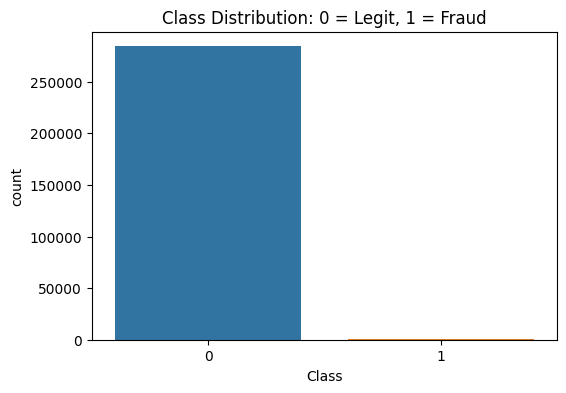


Transaction Amount stats:
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


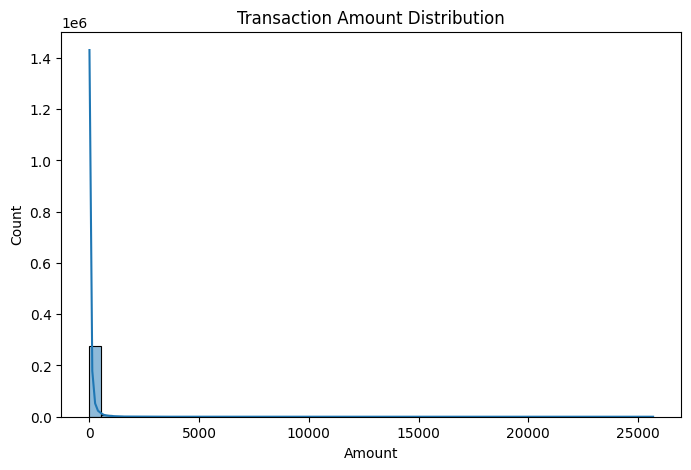

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic info
print("Data info:")
df.info()

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Distribution of the target variable (Class)
print("\nClass distribution:")
print(df['Class'].value_counts())

# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Class Distribution: 0 = Legit, 1 = Fraud")
plt.show()

# Summary statistics for 'Amount' feature
print("\nTransaction Amount stats:")
print(df['Amount'].describe())

# Plot distribution of transaction amounts
plt.figure(figsize=(8,5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

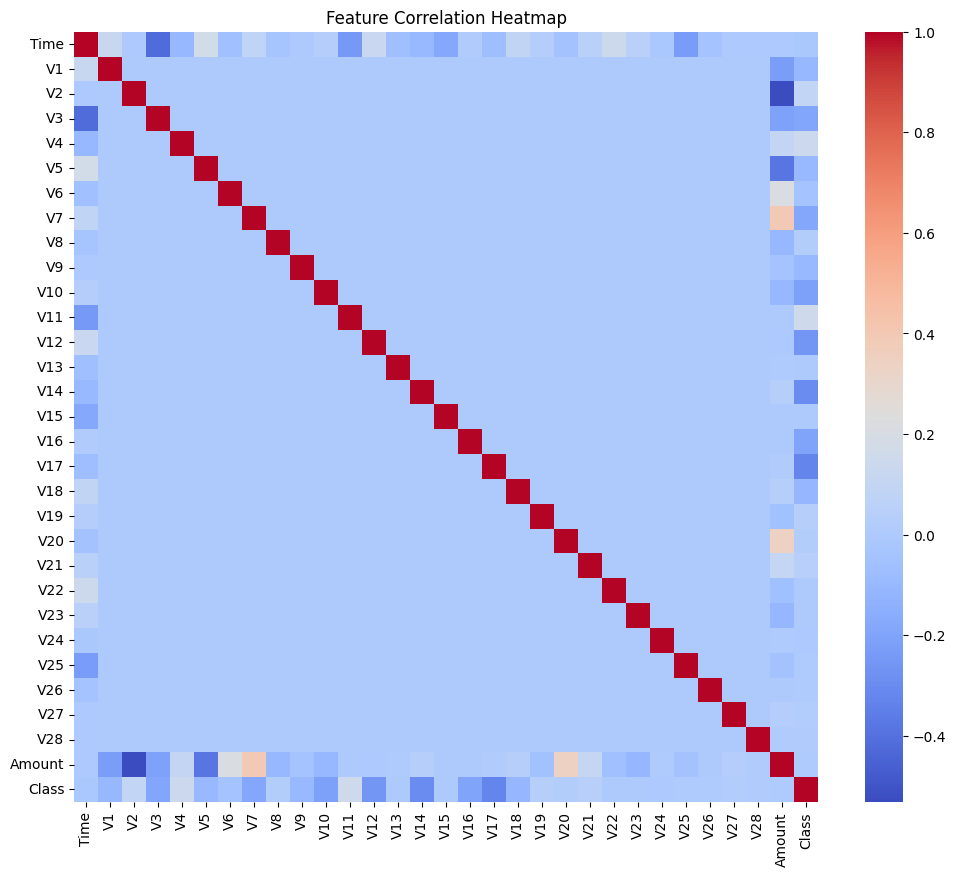

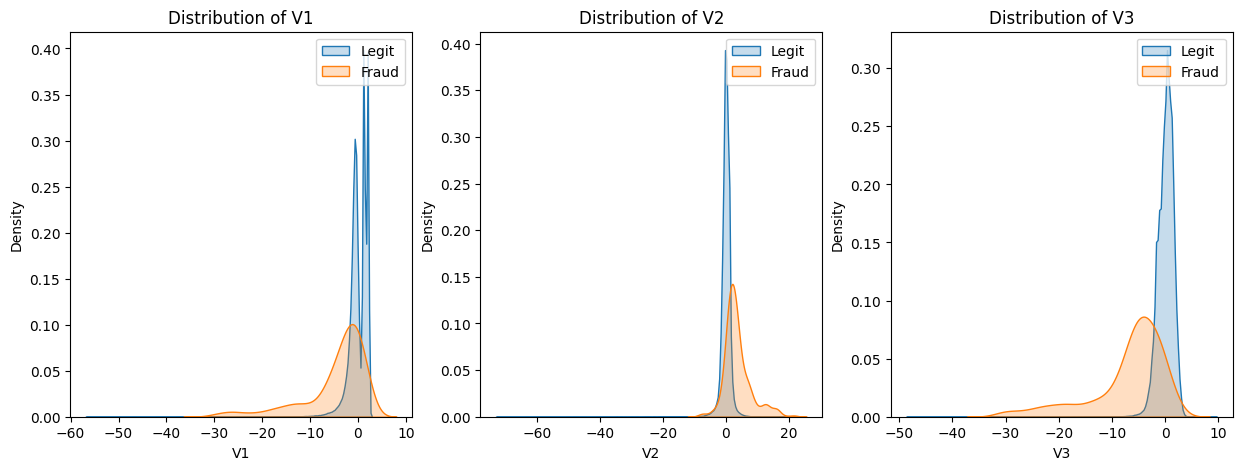

In [14]:
# Correlation heatmap (focus on fraud class)
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# Distribution of a few key features (pick V1, V2, V3 for starters)
plt.figure(figsize=(15,5))
for i, feature in enumerate(['V1', 'V2', 'V3']):
    plt.subplot(1, 3, i+1)
    sns.kdeplot(df[df['Class'] == 0][feature], label='Legit', shade=True)
    sns.kdeplot(df[df['Class'] == 1][feature], label='Fraud', shade=True)
    plt.title(f'Distribution of {feature}')
    plt.legend()
plt.show()

- V2 and amount are negtively correlated.
- V7 and V20 seem to have positive correlation of 0.4 with amount.

# Data Scaling

In [15]:
from sklearn.preprocessing import StandardScaler

df['scaled_amount'] = StandardScaler().fit_transform(df[['Amount']])
df['scaled_time'] = StandardScaler().fit_transform(df[['Time']])

# Drop original 'Amount' and 'Time'
df.drop(['Amount', 'Time'], axis=1, inplace=True)

# Reorder columns if you like
scaled_columns = ['scaled_amount', 'scaled_time'] + [col for col in df.columns if col not in ['scaled_amount', 'scaled_time']]
df = df[scaled_columns]

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


# Class Imbalance Handling - under sampling

In [16]:
from sklearn.utils import resample

# Separate classes
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

# Downsample majority class
non_fraud_downsampled = resample(non_fraud,
                                 replace=False,
                                 n_samples=len(fraud),
                                 random_state=42)

# Combine
df_balanced = pd.concat([fraud, non_fraud_downsampled])

# Shuffle the result
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(df_balanced['Class'].value_counts())

Class
0    492
1    492
Name: count, dtype: int64


# Train-test split

In [17]:
from sklearn.model_selection import train_test_split

X = df_balanced.drop('Class', axis=1)
y = df_balanced['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

Training set: (787, 30), Testing set: (197, 30)


# Training the random forest classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[95  4]
 [ 8 90]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        99
           1       0.96      0.92      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197


Accuracy Score: 0.9390862944162437


# Feature Importance Plots

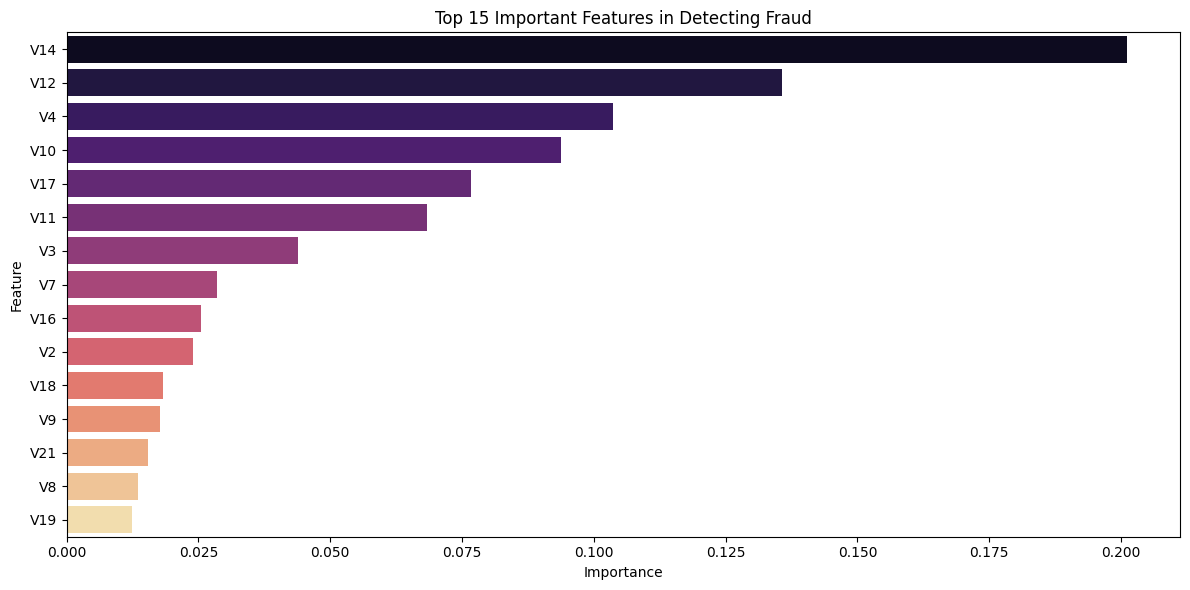

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the top 15 important features
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='magma')
plt.title("Top 15 Important Features in Detecting Fraud")
plt.tight_layout()
plt.show()

- Plotting V14 and V12 by class - This will show how these features behave differently for fraud vs normal transactions.

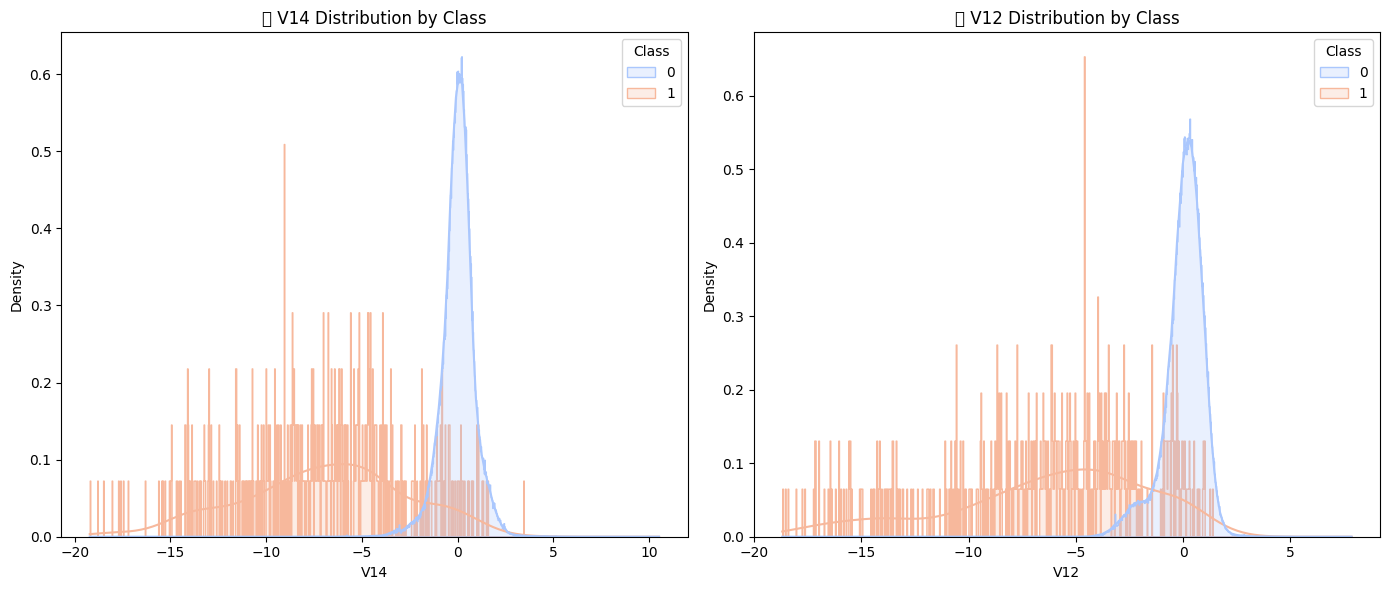

In [20]:
plt.figure(figsize=(14, 6))

# V14 Distribution
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='V14', hue='Class', kde=True, element="step", stat="density", common_norm=False, palette='coolwarm')
plt.title("💡 V14 Distribution by Class")

# V12 Distribution
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='V12', hue='Class', kde=True, element="step", stat="density", common_norm=False, palette='coolwarm')
plt.title("💡 V12 Distribution by Class")

plt.tight_layout()
plt.show()